# Python Classification
We perform classification when the target variable is a category. e.g. We provide predictions to below kind of questions
1. "Wheather to approve a loan or not?" 
2. "Whether this person is a silver/gold/platinum customer?" 
3. "Whether is transaction is fradulent or not?"
4. "The logged support ticket belongs to which category P1/P2/P3?"

## Supervised Machine Learning
Supervised Machine Learning

The majority of practical machine learning uses supervised learning.

Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher. Learning stops when the algorithm achieves an acceptable level of performance.

#### Supervised machine learning problems can be further grouped into regression and classification problems.

* Classification: A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease” or "0/1" etc.
* Regression: A regression problem is when the output variable is a continuous numeric value, such as “Sales”, “Dollars” or “Weight”.

## Classification Case Study: Loan Application Approval
* Problem Statement: "Create a Predictive model which can tell wheather to approve a loan application or not?"
* Target Variable: Loan_Status
* Predictors: Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome etc.

### Exploring the data

In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np
LoanData=pd.read_csv('/Users/farukh/Python ML IVY/Loan Classification Dataset/train.csv', encoding='latin')
print('Shape before deleting duplicate values:', LoanData.shape)

# Removing duplicate rows if any
LoanData=LoanData.drop_duplicates()
print('Shape After deleting duplicate values:', LoanData.shape)
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
LoanData.head(10)

Shape before deleting duplicate values: (614, 13)
Shape After deleting duplicate values: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
# Looking at the number of rows and columns
LoanData.shape

(614, 13)

In [ ]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


### Missing Values Treatment

In [ ]:
LoanData.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Imputing the missing values
# MODE for categorical columns and Median for continuous columns
LoanData['Gender'].fillna(LoanData['Gender'].mode()[0], inplace=True)
LoanData['Married'].fillna(LoanData['Married'].mode()[0], inplace=True)
LoanData['Dependents'].fillna(LoanData['Dependents'].mode()[0], inplace=True)
LoanData['Self_Employed'].fillna(LoanData['Self_Employed'].mode()[0], inplace=True)
LoanData['LoanAmount'].fillna(LoanData['LoanAmount'].median(), inplace=True)
# Using Mode value for Loan_Amount_Termsince it is a discrete variable
LoanData['Loan_Amount_Term'].fillna(LoanData['Loan_Amount_Term'].mode()[0], inplace=True)
LoanData['Credit_History'].fillna(LoanData['Credit_History'].mode()[0], inplace=True)

In [ ]:
# Checking missing values after the treatment
LoanData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Printing the column names 
LoanData.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Removing useless variables from data

In [ ]:
# Data Pre Processing
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Loan_ID']
LoanData = LoanData.drop(UselessColumns,axis=1)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Looking at the statistial distribution of the data
LoanData.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


### Observe the distribution of target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

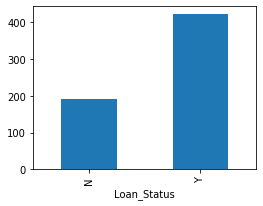

In [ ]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=LoanData.groupby('Loan_Status').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
LoanData.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

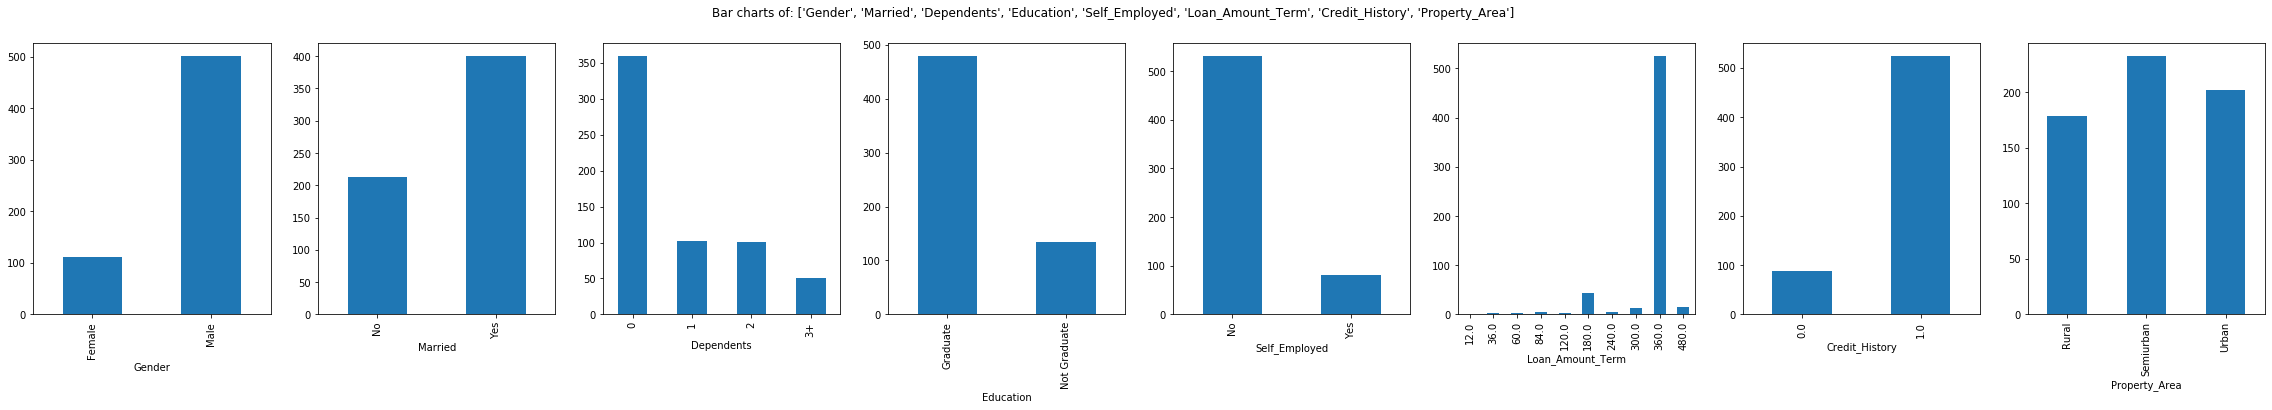

In [ ]:
# Plotting multiple bar charts for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#######################
# Calling the function
PlotBarCharts(inpData=LoanData, colsToPlot=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

### Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12167d990>,
      dtype=object)

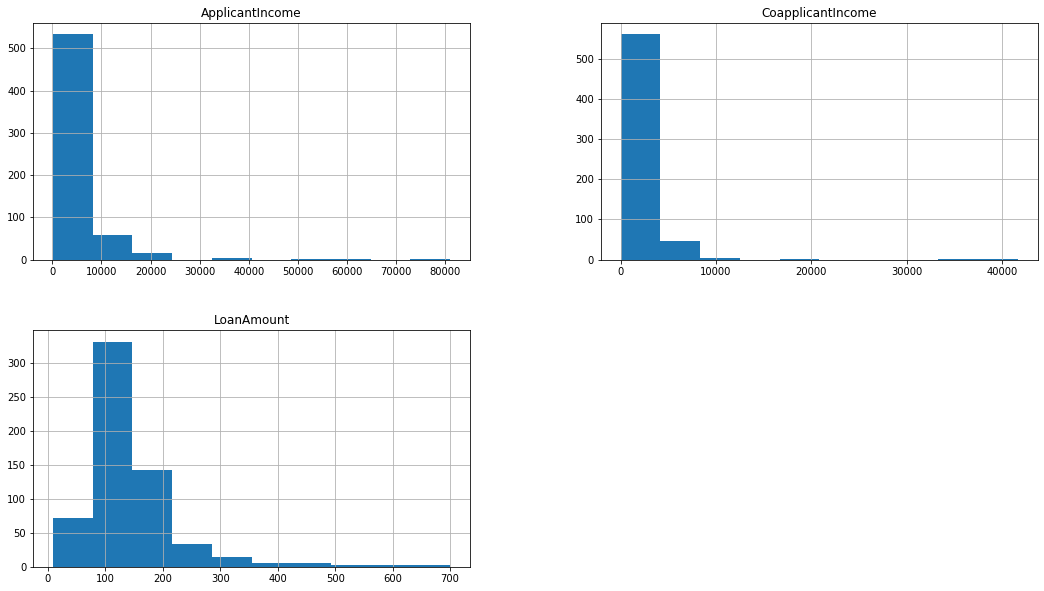

In [ ]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome','LoanAmount'], figsize=(18,10))

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Bar Plot, Box Plot
* Categorical Vs Categorical---- Bar Plot

## Statistical measurement of relationship between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

### Relationship exploration: Categorical Vs Continuous
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

#### Visualizing the relation between Survived and Fare using bar charts
We Group by and keep categorical variable in the X-Axis and the continuous variable in the Y-Axis

In [ ]:
# Grouping by Categorical variable Survived to find the aggregated values
GroupedData=LoanData.groupby(['Loan_Status'])

# Printing the aggregated values
#GroupedData.size()
#GroupedData.sum()
#GroupedData.count()
GroupedData.mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,149.890625,344.56250,0.572917
Y,5384.068720,1504.516398,143.869668,341.43128,0.983412


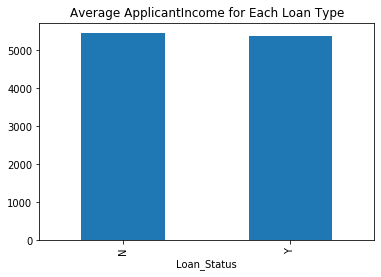

In [ ]:
# Creating the graph with Price
# You can observice that many people who survived has paid higher fares!
GroupedData.mean()['ApplicantIncome'].plot(kind='bar', title='Average ApplicantIncome for Each Loan Type')

#### Looking at the variances in Fare by each Survival type in box plot
IF the distribution of each type is similar, it gives a hint that there is no correlation Between the categorical and the numeric variable

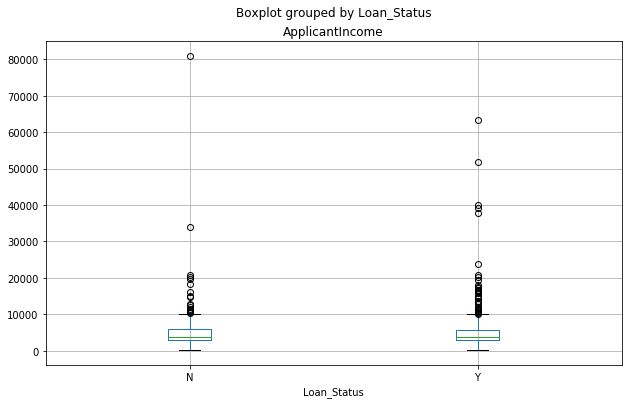

In [ ]:
# Box plot for Categorical Variable Survived Vs Continuous Variable Fare
# Observe the outlier in Fare for Survived=1
LoanData.boxplot(column='ApplicantIncome', by='Loan_Status', figsize=(10,6), vert=True)

In [ ]:
# Finding those rows where ApplicantIncome column has outliers
# All the outlier fares are coming from Pclass=1 which makes sense!
Filter1=LoanData['ApplicantIncome']>22000
Filter2=LoanData['Loan_Status']=='N'
LoanData[Filter1 & Filter2]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
183,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


#### Outlier Treatment
* Option-1: Delete the outlier Records
* Option-2: Impute the outlier values with a logical business value
* Below we are Finding out the most logical value to be replaced in place of outliers by looking at the box-plot

In [ ]:
# Replacing the outlier records of Fare with value 263
LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>30000] = 23803

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Box plot after Outlier treatment

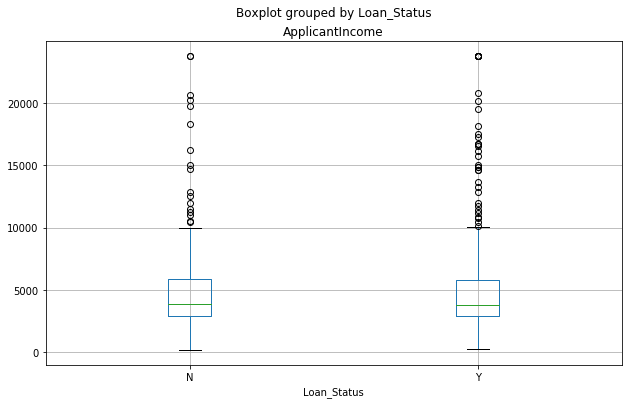

In [ ]:
# Observing the relationship of Loan_Status with ApplicantIncome variable again after Outlier treatment
# You can see that the distribution has improved now
LoanData.boxplot(column='ApplicantIncome', by='Loan_Status', figsize=(10,6), vert=True)

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [ ]:
# f_oneway() function takes the group data as input and returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between Fare and Survived
# Assumption(H0) is that Fare and Survived are NOT correlated with each other

# Performing the ANOVA test
CategoryGroupLists=LoanData.groupby('Loan_Status')['ApplicantIncome'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)

# Extreme example when all values are same and the variables are not correlated
#AnovaResults = f_oneway( [10,20], [10,20], [10,20] )

# Extreme example when all the values are different and both variables has correlation
#AnovaResults = f_oneway( [400,500], [7,10], [0.006,0.00001] )

print('P-Value for Anova is: ', AnovaResults[1])

# We accept the Assumption(H0) only when P-Value > 0.05
# Here the P-Value is almost ONE which means we will ACCEPT the Assumption(H0)
# This means Loan_Status and ApplicantIncome ARE NOT correlated with each other

P-Value for Anova is:  0.9529534007092838


In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
FunctionAnova(inpData=LoanData, TargetVariable='Loan_Status', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

ApplicantIncome is NOT correlated with Loan_Status | P-Value: 0.9529534007092838
CoapplicantIncome is NOT correlated with Loan_Status | P-Value: 0.1429482868428829
LoanAmount is NOT correlated with Loan_Status | P-Value: 0.41132365467797827


[]

### Relationship exploration: Categorical Vs Categorical
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

In [ ]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=LoanData['Gender'], columns=LoanData['Loan_Status'])
CrossTabResult

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


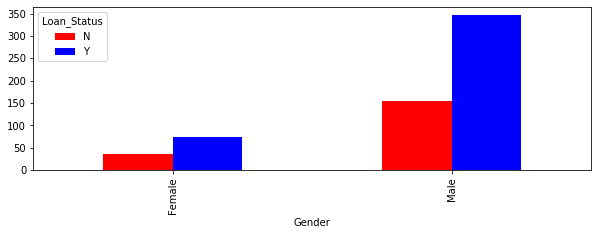

In [ ]:
# Visual Inference using Grouped Bar chart
CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [ ]:
from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrossTabResult)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
# In this case it is higher than 0.05 Hence, we accept H0
# this means the two columns are NOT correlated with each other and 
# Gender of a person does not affects the Loan Approval

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.7391461310869638


In [ ]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [ ]:
# Calling the function
CategoricalVariables=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']
FunctionChisq(inpData=LoanData, TargetVariable='Loan_Status',CategoricalVariablesList= CategoricalVariables)

Gender is NOT correlated with Loan_Status | P-Value: 0.7391461310869638
Married is correlated with Loan_Status | P-Value: 0.029608580862582116
Dependents is NOT correlated with Loan_Status | P-Value: 0.3688663081366005
Education is correlated with Loan_Status | P-Value: 0.04309962129357355
Self_Employed is NOT correlated with Loan_Status | P-Value: 0.9710746411403309
Loan_Amount_Term is NOT correlated with Loan_Status | P-Value: 0.13058516348934335
Credit_History is correlated with Loan_Status | P-Value: 3.4183499979091188e-40
Property_Area is correlated with Loan_Status | P-Value: 0.0021360187811644915


['Married', 'Education', 'Credit_History', 'Property_Area']

## Data Pre-processing for Machine Learning
List of steps performed before data can be used for machine learning
1. Treating Missing Values (Interpolate/Replace with median/Mode values)
2. Treating Outliers (Delete or replace with nearby logical value)
3. Converting each Ordinal Categorical columns to numeric
4. Converting all nominal Categorical columns to numeric
5. Data Transformation (Optional): Standardization/Normalization/log/sqrt

### Data Pre-Processing: Treating Missing Values
Various options for treating missing values in data
* Delete the missing value rows 
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [ ]:
# Finding out how many missing values are present in each column
LoanData.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data Pre-Processing: Treating Outliers
* Outliers are treated always in context to the target variable
* Outliers are treated by either deleting them or replacing the outlier values with a logical value as per business and similar data

In [ ]:
# Referring to the bar charts plotted earlier for all the categorical columns
# Referring to the histograms plotted earlier for all the continuous columns

In [ ]:
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Pre-Processing: Converting Categorical data to numeric
1. First Treat all Ordinal variables by manually mapping the numeric values
2. Treat all nominal variables using dummy variables

In [ ]:
# Treating all the binary nominal variables first
LoanData['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
LoanData['Married'].replace({'Yes':1, 'No':0}, inplace=True)
LoanData['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)
LoanData['Self_Employed'].replace({'Yes':1, 'No':0}, inplace=True)
LoanData['Loan_Status'].replace({'Y':1, 'N':0}, inplace=True)

LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
LoanData['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
# Treating the Ordinal Variable Dependents
LoanData['Dependents'].replace({'0':0, '1':1,'2':2, '3+':3 }, inplace=True)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
# Treating all the nominal variables at once using dummy variables
LoanDataNumeric=pd.get_dummies(LoanData)
LoanDataNumeric.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,0,1


In [ ]:
# Saving the processed data as a pickle file
LoanDataNumeric.to_pickle('TitanicSurvivalDataNumeric.pkl')

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Printing all the column names for our reference
LoanDataNumeric.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan_Status'
Predictors=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Rural', 'Property_Area_Semiurban','Property_Area_Urban']

X=LoanDataNumeric[Predictors].values
y=LoanDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan_Status'
Predictors=['Married', 'Education', 'Credit_History',
       'Property_Area_Rural', 'Property_Area_Semiurban','Property_Area_Urban']

X=LoanDataNumeric[Predictors].values
y=LoanDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 6)
(429,)
(185, 6)
(185,)


In [ ]:
X_train[0:3]

array([[1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 1., 0.]])

## Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
#choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model: 0.76


,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,PredictedLoan_Status
0,1.0,1.0,1.0,0.0,1.0,0.0,1,1
1,1.0,1.0,1.0,0.0,1.0,0.0,1,1
2,1.0,1.0,1.0,1.0,0.0,0.0,1,1
3,0.0,1.0,1.0,1.0,0.0,0.0,1,1
4,0.0,1.0,1.0,0.0,1.0,0.0,1,1


In [ ]:
# Picking up only the F1Score from the classification report output
# average : string, [None, 'binary' (default), 'micro', 'macro', 'samples','weighted']
print(metrics.f1_score(y_test, prediction, average='weighted'))

0.7564817361302097


## Decision Trees

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model: 0.76


,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,PredictedLoan_Status
0,1.0,1.0,1.0,0.0,1.0,0.0,1,1
1,1.0,1.0,1.0,0.0,1.0,0.0,1,1
2,1.0,1.0,1.0,1.0,0.0,0.0,1,1
3,0.0,1.0,1.0,1.0,0.0,0.0,1,1
4,0.0,1.0,1.0,0.0,1.0,0.0,1,1


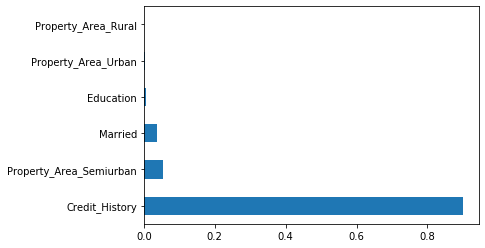

In [ ]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting a Decision Tree

In [ ]:
# Installing the required library for plotting the decision tree
#!pip install dtreeplt

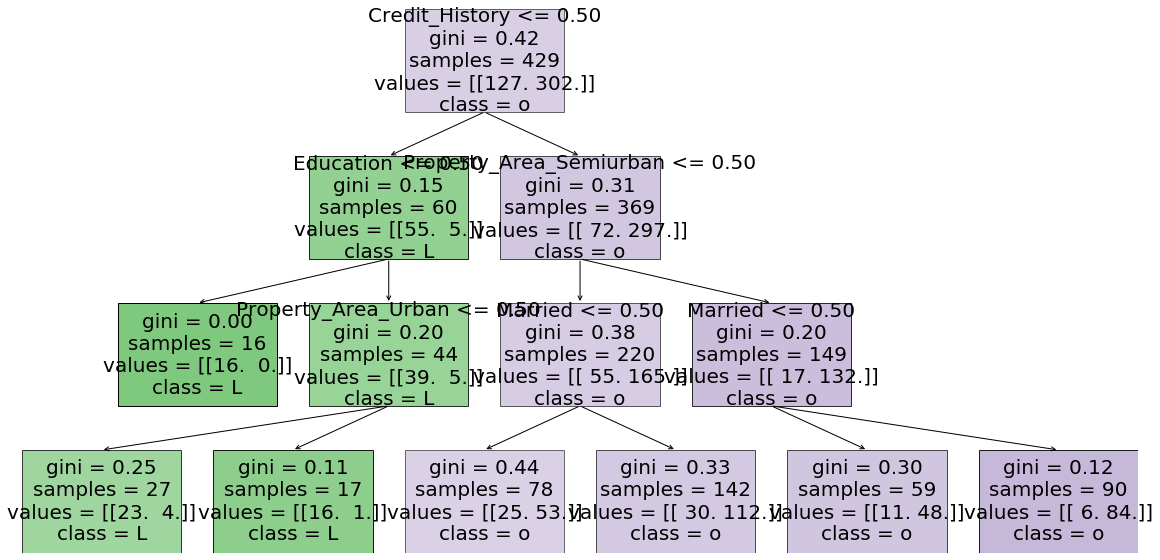

In [ ]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt
#fig, subplt=plt.subplots(nrows=1,ncols=1, figsize=(10, 10))
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(20,10)

## Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model: 0.76


,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,PredictedLoan_Status
0,1.0,1.0,1.0,0.0,1.0,0.0,1,1
1,1.0,1.0,1.0,0.0,1.0,0.0,1,1
2,1.0,1.0,1.0,1.0,0.0,0.0,1,1
3,0.0,1.0,1.0,1.0,0.0,0.0,1,1
4,0.0,1.0,1.0,0.0,1.0,0.0,1,1


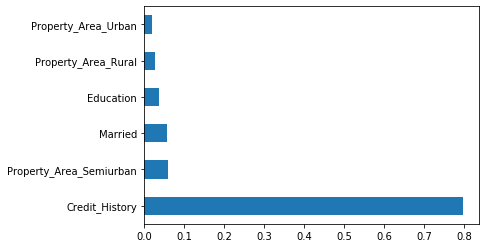

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, n_estimators=500,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting one of the Decision Trees in Random Forest

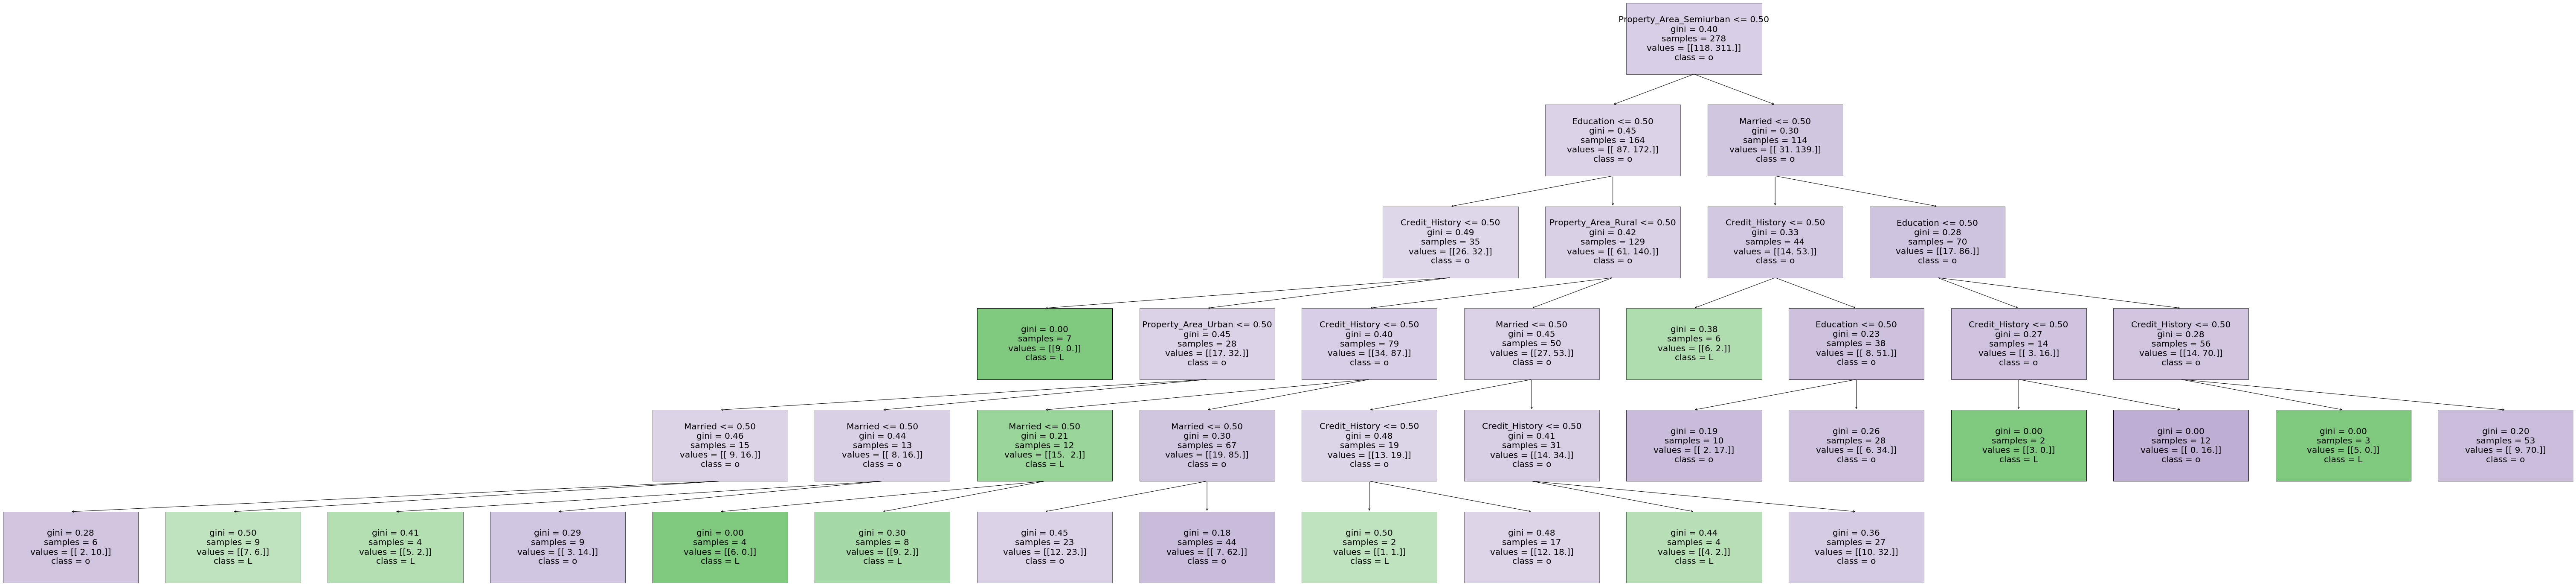

In [ ]:
# PLotting 10th single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## AdaBoost

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,PredictedLoan_Status
0,1.0,1.0,1.0,0.0,1.0,0.0,1,1
1,1.0,1.0,1.0,0.0,1.0,0.0,1,1
2,1.0,1.0,1.0,1.0,0.0,0.0,1,1
3,0.0,1.0,1.0,1.0,0.0,0.0,1,1
4,0.0,1.0,1.0,0.0,1.0,0.0,1,1


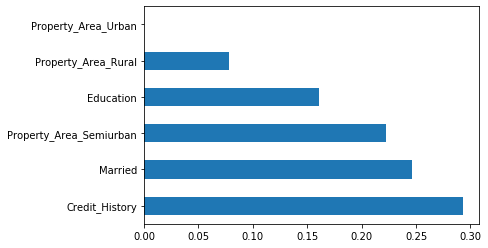

In [ ]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=2000, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting one of the Decision trees from Adaboost

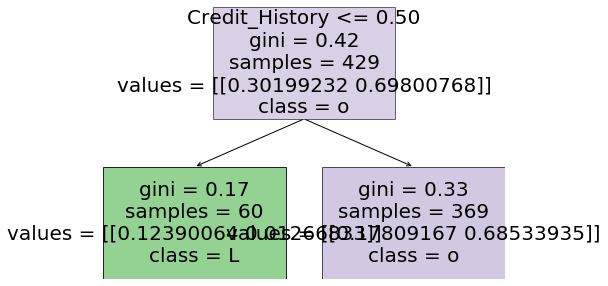

In [ ]:
# PLotting 5th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## XGBoost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=None, n_estimators=1000,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model: 0.76


,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,PredictedLoan_Status
0,1.0,1.0,1.0,0.0,1.0,0.0,1,1
1,1.0,1.0,1.0,0.0,1.0,0.0,1,1
2,1.0,1.0,1.0,1.0,0.0,0.0,1,1
3,0.0,1.0,1.0,1.0,0.0,0.0,1,1
4,0.0,1.0,1.0,0.0,1.0,0.0,1,1


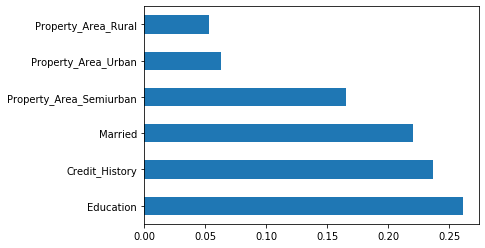

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=1000, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting a single Decision tree out of XGBoost

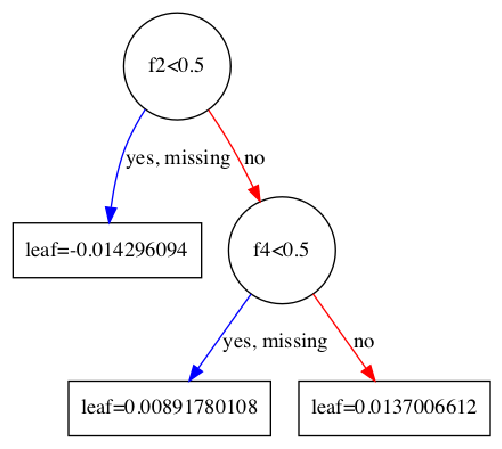

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

## KNN

In [ ]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model: 0.76


,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,1.0,1.0,1.0,0.0,1.0,0.0,1,1
1,1.0,1.0,1.0,0.0,1.0,0.0,1,1
2,1.0,1.0,1.0,1.0,0.0,0.0,1,1
3,0.0,1.0,1.0,1.0,0.0,0.0,1,1
4,0.0,1.0,1.0,0.0,1.0,0.0,1,1


## SVM

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model: 0.76


,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,1.0,1.0,1.0,0.0,1.0,0.0,1,1
1,1.0,1.0,1.0,0.0,1.0,0.0,1,1
2,1.0,1.0,1.0,1.0,0.0,0.0,1,1
3,0.0,1.0,1.0,1.0,0.0,0.0,1,1
4,0.0,1.0,1.0,0.0,1.0,0.0,1,1


## Naive Bayes

In [ ]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model: 0.76


,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,1.0,1.0,1.0,0.0,1.0,0.0,1,1
1,1.0,1.0,1.0,0.0,1.0,0.0,1,1
2,1.0,1.0,1.0,1.0,0.0,0.0,1,1
3,0.0,1.0,1.0,1.0,0.0,0.0,1,1
4,0.0,1.0,1.0,0.0,1.0,0.0,1,1


## K-Fold Cross Validation

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

In [ ]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print(Accuracy_Values)
print('Final Average Accuracy of the model:', Accuracy_Values.mean())

[0.75752231 0.80832188 0.7558112  0.70664188 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]
Final Average Accuracy of the model: 0.7832588955393239


# Deployment of the Model
In order to deploy the model we follow below steps
1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the rating of restaurent(s)

#### Step 1. Retraining the model using 100% data

In [ ]:
# Training the model on 100% Data available
FinalAdaboostModel=AB.fit(X,y)

#### Step 2. Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalAdaboostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalAdaboostModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /Users/farukh/Python ML IVY/Loan Classification Case Study


#### Step 3. Create a python function

In [ ]:
# This function will take input one or more rows of restaurent details and output their ratings
# This can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    
    # Loading the Function from pickle file
    with open('FinalAdaboostModel.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
        
    # Genrating Predictions
    Prediction=AdaBoost_model.predict(InputLoanDetails)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [ ]:
#Calling the function for some loan cases from the data
PredictLoanStatus(InputLoanDetails=X[0:10,:])

,Predicted Status
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,0
8,1
9,1


## Generating predictions on the test data

In [ ]:
## Generating predictions on the test data
LoanTestData=pd.read_csv('/Users/farukh/Python ML IVY/Loan Classification Dataset/test.csv', encoding='latin')
print('Shape before deleting duplicate values:', LoanTestData.shape)

# Removing duplicate rows if any
LoanTestData=LoanTestData.drop_duplicates()
print('Shape After deleting duplicate values:', LoanTestData.shape)
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
LoanTestData.head(10)

Shape before deleting duplicate values: (367, 12)
Shape After deleting duplicate values: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [ ]:
# Data Pre Processing
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Loan_ID']
LoanTestData = LoanTestData.drop(UselessColumns,axis=1)
LoanTestData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# Missing Values Treatment
LoanTestData.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
# Imputing the missing values
# MODE for categorical columns and Median for continuous columns
LoanTestData['Gender'].fillna(LoanTestData['Gender'].mode()[0], inplace=True)
LoanTestData['Dependents'].fillna(LoanTestData['Dependents'].mode()[0], inplace=True)
LoanTestData['Self_Employed'].fillna(LoanTestData['Self_Employed'].mode()[0], inplace=True)
LoanTestData['LoanAmount'].fillna(LoanTestData['LoanAmount'].median(), inplace=True)
# Using Mode value for Loan_Amount_Termsince it is a discrete variable
LoanTestData['Loan_Amount_Term'].fillna(LoanTestData['Loan_Amount_Term'].mode()[0], inplace=True)
LoanTestData['Credit_History'].fillna(LoanTestData['Credit_History'].mode()[0], inplace=True)

In [ ]:
# Rechecking the missing values
LoanTestData.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Performing same pre-processing on Test data which was done on Train data

In [ ]:
# Treating all the binary nominal variables first
LoanTestData['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
LoanTestData['Married'].replace({'Yes':1, 'No':0}, inplace=True)
LoanTestData['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)
LoanTestData['Self_Employed'].replace({'Yes':1, 'No':0}, inplace=True)

# Treating the Ordinal Variable Dependents
LoanTestData['Dependents'].replace({'0':0, '1':1,'2':2, '3+':3 }, inplace=True)

LoanTestData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,Urban
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,Urban
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# Treating all the nominal variables at once using dummy variables
LoanTestDataNumeric=pd.get_dummies(LoanTestData)
LoanTestDataNumeric.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,0,0,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0,0,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0,0,1
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,0,0,1
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,0,0,1


In [ ]:
# Extracting the predictor columns defined above for Training
X=LoanTestDataNumeric[Predictors]
X[0:5]

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,1.0,0,0,1
1,1,1,1.0,0,0,1
2,1,1,1.0,0,0,1
3,1,1,1.0,0,0,1
4,0,0,1.0,0,0,1


In [ ]:
LoanTestData['Predicted_Loan_Status']=PredictLoanStatus(InputLoanDetails=X)
LoanTestData.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,Urban,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban,1
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,Urban,1
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,Urban,1
5,1,1,0,0,1,2165,3422,152.0,360.0,1.0,Urban,1
6,0,0,1,0,0,2226,0,59.0,360.0,1.0,Semiurban,1
7,1,1,2,0,0,3881,0,147.0,360.0,0.0,Rural,0
8,1,1,2,1,0,13633,0,280.0,240.0,1.0,Urban,1
9,1,0,0,0,0,2400,2400,123.0,360.0,1.0,Semiurban,1


In [ ]:
LoanTestData.to_csv('LoanTestData.csv')

# Deploying a predictive model as API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js

 ## Creating the model with few parameters

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan_Status'
Predictors=['Married', 'Education', 'Credit_History']

X=LoanDataNumeric[Predictors]
y=LoanDataNumeric[TargetVariable]

# Printing sample Training data
X[0:5]

,Married,Education,Credit_History
0,0,1,1.0
1,1,1,1.0
2,1,1,1.0
3,1,0,1.0
4,0,1,1.0


## Retrain the model using full data

In [ ]:
# Creating Adaboost model
FinalAdaboostModel=AB.fit(X,y)

In [ ]:
# Sample Prediction
SampleInputData=[[0, 1 , 1.0]]
FinalAdaboostModel.predict(SampleInputData)

array([1])

## Saving the model pickle file

In [ ]:
# Saving the model as pickle file
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalAdaboostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalAdaboostModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /Users/farukh/Python ML IVY/Loan Classification Case Study


## Function for predictions

In [ ]:
# Creating the function which can take loan inputs and perform prediction
def FunctionLoanPrediction(inp_married, inp_education, inp_credit_history):
    SampleInputData=[[inp_married, inp_education , inp_credit_history]]
    
    # Loading the model from pickle file
    with open('FinalAdaboostModel.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
        
    # Returning the predicted loan status
    return('Approval Status: ' + str(AdaBoost_model.predict(SampleInputData)))

# Function call
FunctionLoanPrediction(inp_married=0, inp_education=1, inp_credit_history=1.0)

'Approval Status: [1]'

In [ ]:
# Installing the flask library
!pip install flask

## Creating Flask API

In [ ]:
from flask import Flask,request,jsonify
import pickle
import pandas as pd
import numpy

In [ ]:
app = Flask(__name__)

@app.route('/get_loan_prediction', methods=["GET"])
def get_loan_prediction():
    try:
        # Getting the paramters from API call
        married_value = request.args.get('Married')
        education_value = request.args.get('Education')
        credit_value=request.args.get('CreditHistory')
        
        # Calling the funtion to get loan approval status
        prediction_from_api=FunctionLoanPrediction(inp_married=married_value,
                               inp_education=education_value, 
                               inp_credit_history=credit_value)

        return jsonify(prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

## Starting the API engine

In [ ]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

Interrupt kernel to stop the API
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Jun/2020 22:47:57] "GET /get_loan_prediction?Married=1&Education=1&CreditHistory=0 HTTP/1.1" 200 -


## Sample URL to call the API

#### Copy and paste below URL in the web browser
http://127.0.0.1:8080/get_loan_prediction?Married=1&Education=1&CreditHistory=0